In [137]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import shap  
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import xgboost as xgb
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import RobustScaler
from tensorflow import keras
import lightgbm as lgb
from lightgbm import *
from sklearn.preprocessing import LabelEncoder
import tensorflow 
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

## Model evaluators

from sklearn import datasets, metrics, model_selection
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv(r"/content/Track_1.csv",index_col=0)
df.head()

,Number of people who will provide maintenance,Loan History,Purpose of taking loan,loan amount taken,Guarantor or Debtor,Number of years of employment,Marital Status,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,...,Other loans plans taken,Working abroad or not,Is there telephone number available,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not,1=defaulted
0,1,critical account/other loans existing (not at ...,New Car Purchase,1028,none,between 1 and 4 years,female and divorced/seperated/married,2,36,no current account,...,none,Yes,No,18,Real Estate,skilled employee / official,own,3,1,2=not defaulted
1,1,existing loans paid back duly till now,Purchase of radio/television,10222,none,greater than 4 years,male and single,1,37,no current account,...,stores,Yes,Yes,48,car or other property,skilled employee / official,own,3,1,NaN
2,1,existing loans paid back duly till now,Purchase of radio/television,701,none,between 1 and 4 years,male and married/widowed,1,40,less than 0,...,none,Yes,No,12,Real Estate,unskilled - resident,own,2,1,NaN
3,1,existing loans paid back duly till now,Purchase of radio/television,1670,none,less than a year,female and divorced/seperated/married,1,22,between 0 and 200,...,none,Yes,Yes,9,car or other property,skilled employee / official,own,2,2,NaN
4,1,critical account/other loans existing (not at ...,New Car Purchase,1163,none,between 1 and 4 years,male and single,1,44,no current account,...,none,Yes,Yes,12,Real Estate,skilled employee / official,own,4,1,NaN


Inferential & Descriptive Statistics

In [140]:
df.shape

(600, 22)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Number of people who will provide maintenance  600 non-null    int64 
 1   Loan History                                   600 non-null    object
 2   Purpose of taking loan                         591 non-null    object
 3   loan amount taken                              600 non-null    int64 
 4   Guarantor or Debtor                            600 non-null    object
 5   Number of years of employment                  447 non-null    object
 6   Marital Status                                 600 non-null    object
 7   Number of loans taken from current bank        600 non-null    int64 
 8   Age of the applicant in Number of Years        600 non-null    int64 
 9   amount in current account                      600 non-null    ob

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of people who will provide maintenance,600.0,1.168333,0.374474,1.0,1.00,1.0,1.00,2.0
loan amount taken,600.0,3165.848333,2689.041881,276.0,1346.75,2246.5,3880.25,15672.0
Number of loans taken from current bank,600.0,1.373333,0.566708,1.0,1.00,1.0,2.00,4.0
Age of the applicant in Number of Years,600.0,36.058333,11.700417,19.0,27.00,34.0,42.00,75.0
% of income paid as installment,600.0,2.943333,1.124973,1.0,2.00,3.0,4.00,4.0
time duration for loan,600.0,20.660000,12.198185,4.0,12.00,18.0,24.00,72.0
Number of years of stay in current address,600.0,2.871667,1.097210,1.0,2.00,3.0,4.00,4.0
Loan Defaulted or not,600.0,1.296667,0.457169,1.0,1.00,1.0,2.00,2.0


In [143]:
num_columns = list(df[df.columns].select_dtypes(include=['float64']).columns)
cat_columns = list(df[df.columns].select_dtypes(include=['object']).columns)

In [144]:
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing.columns  = ['% missing']
missing = missing[missing['% missing']>0]
missing

,% missing
1=defaulted,99.833333
Number of years of employment,25.500000
Purpose of taking loan,1.500000


Conclusion:- Out of 22 features, 3 have missing values but percentage is very highest in 1=defaulted so we drop it

In [145]:
df['Loan Defaulted or not'].value_counts()

1    422
2    178
Name: Loan Defaulted or not, dtype: int64

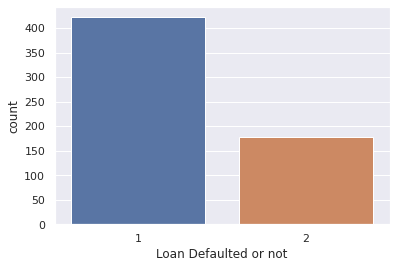

In [146]:
sns.countplot(x ='Loan Defaulted or not', data = df)

Conclusion - Target Variable is unbalanced

In [147]:
cat_columns

['Loan History',
 'Purpose of taking loan',
 'Guarantor or Debtor',
 'Number of years of employment',
 'Marital Status',
 'amount in current account',
 'amount in savings account',
 'Other loans plans taken',
 'Working abroad or not',
 'Is there telephone number available',
 'Owned property',
 'Type of job performed',
 'Type of Housing',
 '1=defaulted']

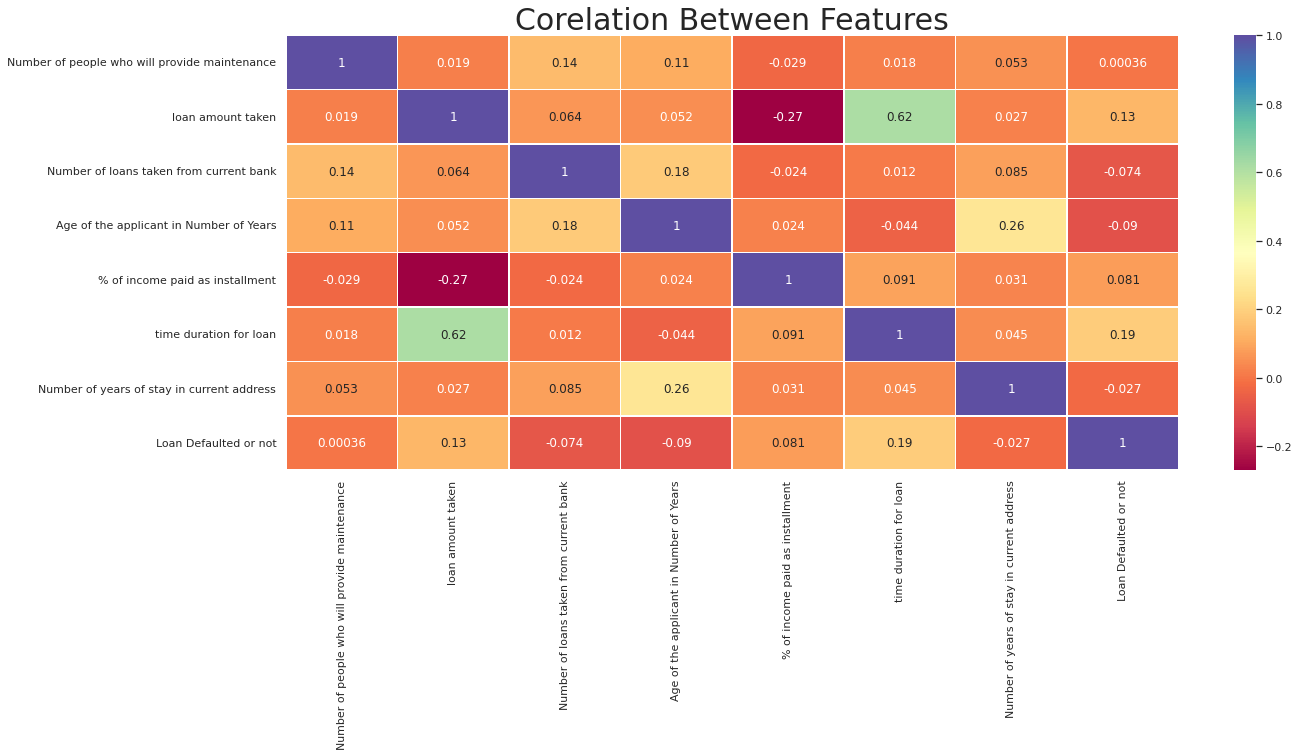

In [148]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap="Spectral",
            annot=True, linewidths=0.5)
plt.title('Corelation Between Features', fontsize=30)
plt.show()

Categorical Column Distribution

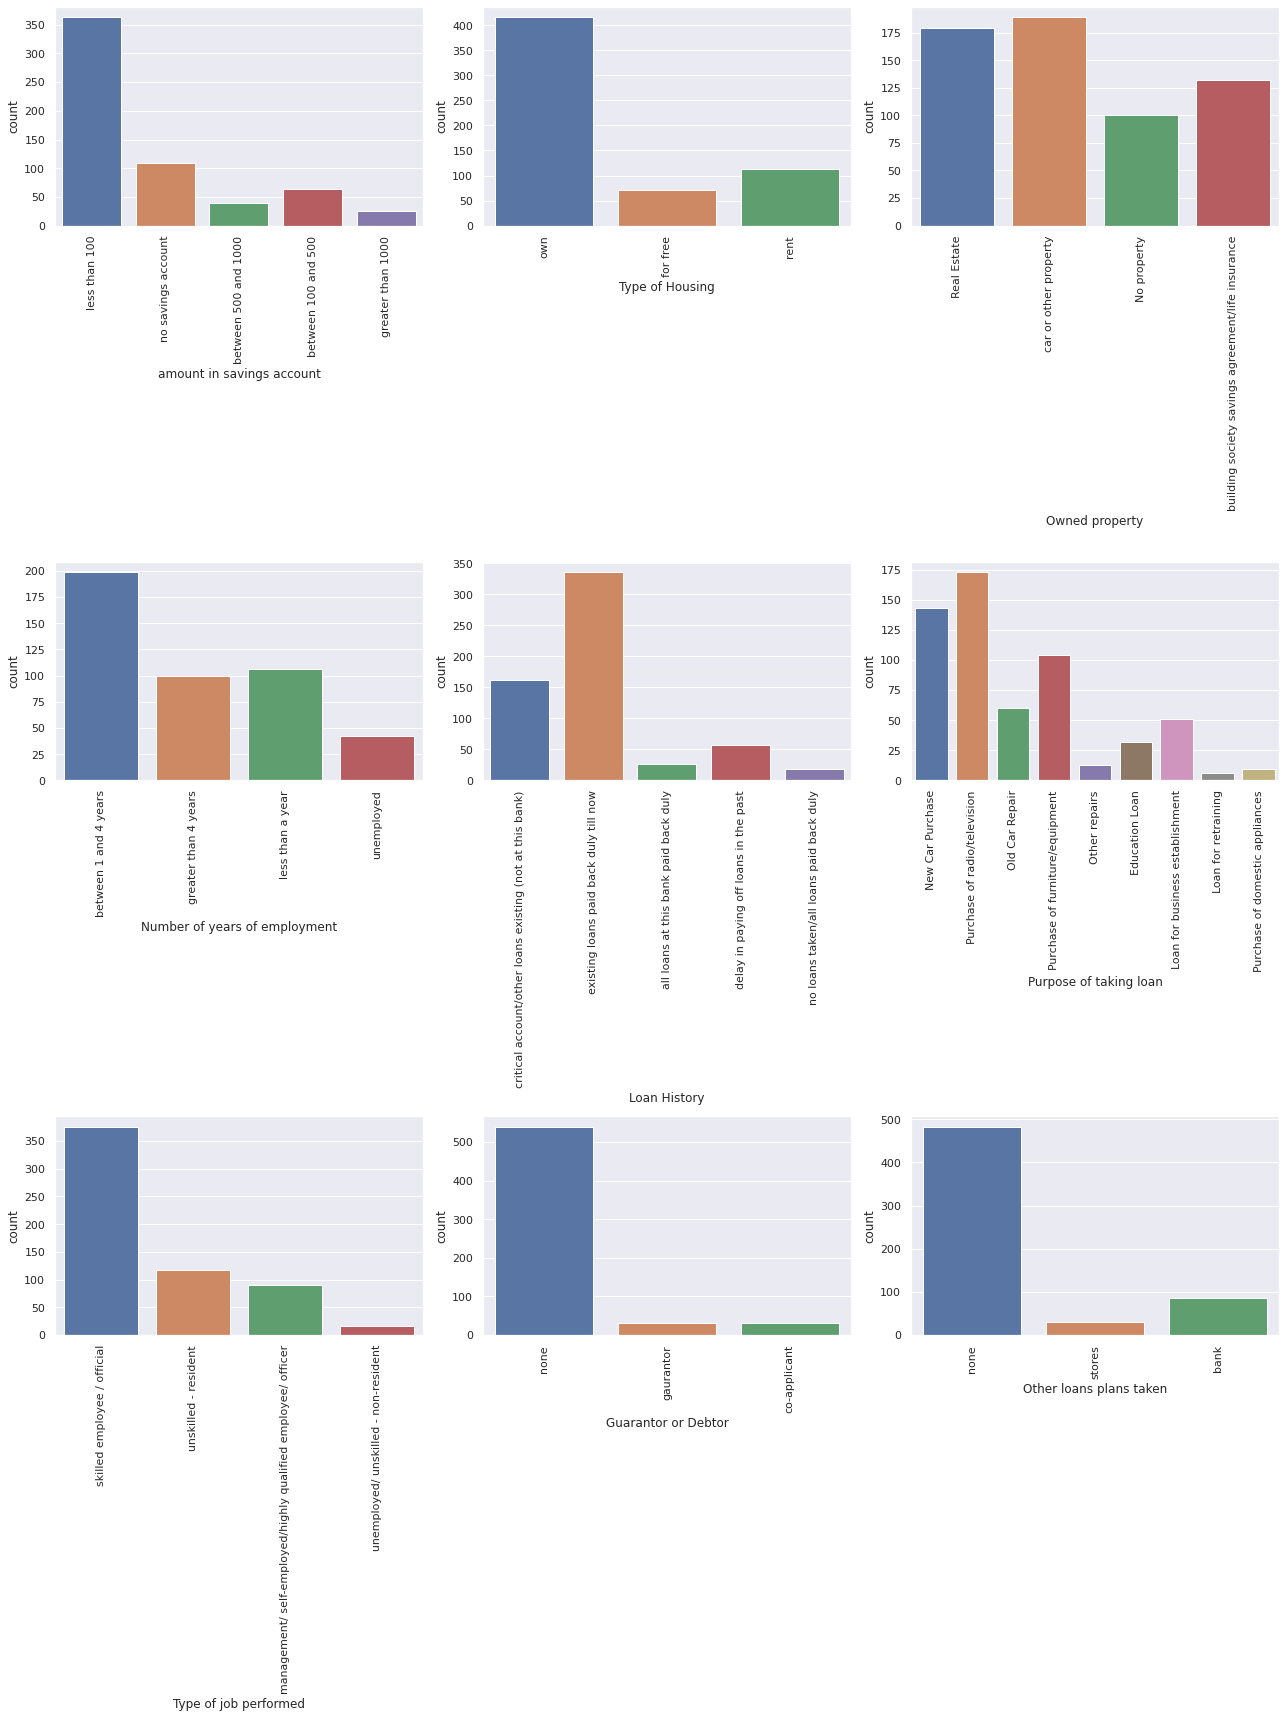

In [149]:
fig, axes = plt.subplots(3, 3, figsize=(18, 24))
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

sns.countplot(ax=axes[0, 0], data=df, x='amount in savings account')
sns.countplot(ax=axes[0, 1], data=df, x='Type of Housing')
sns.countplot(ax=axes[0, 2], data=df, x='Owned property')
sns.countplot(ax=axes[1, 0], data=df, x='Number of years of employment')
sns.countplot(ax=axes[1, 1], data=df, x='Loan History')
sns.countplot(ax=axes[1, 2], data=df, x='Purpose of taking loan')
sns.countplot(ax=axes[2, 0], data=df, x='Type of job performed')
sns.countplot(ax=axes[2, 1], data=df, x='Guarantor or Debtor')
sns.countplot(ax=axes[2, 2], data=df, x='Other loans plans taken')

fig.tight_layout(pad=1.0)
 
plt.show()

Feature Selection

In [150]:
df.corr()

,Number of people who will provide maintenance,loan amount taken,Number of loans taken from current bank,Age of the applicant in Number of Years,% of income paid as installment,time duration for loan,Number of years of stay in current address,Loan Defaulted or not
Number of people who will provide maintenance,1.000000,0.019487,0.143908,0.111681,-0.028836,0.018398,0.052665,0.000358
loan amount taken,0.019487,1.000000,0.064329,0.052143,-0.270338,0.616553,0.026749,0.133209
Number of loans taken from current bank,0.143908,0.064329,1.000000,0.182268,-0.024371,0.011631,0.085236,-0.073802
Age of the applicant in Number of Years,0.111681,0.052143,0.182268,1.000000,0.024223,-0.044181,0.264828,-0.090317
% of income paid as installment,-0.028836,-0.270338,-0.024371,0.024223,1.000000,0.091418,0.030616,0.081432
time duration for loan,0.018398,0.616553,0.011631,-0.044181,0.091418,1.000000,0.045007,0.188456
Number of years of stay in current address,0.052665,0.026749,0.085236,0.264828,0.030616,0.045007,1.000000,-0.027147
Loan Defaulted or not,0.000358,0.133209,-0.073802,-0.090317,0.081432,0.188456,-0.027147,1.000000


In [151]:
df.drop(['1=defaulted','Purpose of taking loan','Is there telephone number available','Marital Status'], axis = 1, inplace = True) 

Dropping these columns because of the following reasons
- 1=fedaulted out of 600 rows, 599 rows are missing for this column
- Purpose of taking loan - isnt a factor 
- is telephone number available, Marital Status - again not a factor

## Pre-processing

In [152]:
##label encoding 
veri_status_mapping={"none":0,"co-applicant":1,"gaurantor":2}
df["Guarantor or Debtor"]=df["Guarantor or Debtor"].map(veri_status_mapping)

In [153]:
veri_status_mapping={"for free":0,"rent":1,"own":2}
df["Type of Housing"]=df["Type of Housing"].map(veri_status_mapping)

In [154]:
veri_status_mapping={"No":0,"Yes":1}
df["Working abroad or not"]=df["Working abroad or not"].map(veri_status_mapping)

In [155]:
veri_status_mapping={"No property":0,"car or other property":1,"building society savings agreement/life insurance":2,"Real Estate":3}
df["Owned property"]=df["Owned property"].map(veri_status_mapping)

In [156]:
veri_status_mapping={"unskilled - resident":0,"unemployed/ unskilled - non-resident":1,"skilled employee / official":2,"management/ self-employed/highly qualified employee/ officer":3}
df["Type of job performed"]=df["Type of job performed"].map(veri_status_mapping)

In [157]:
veri_status_mapping={"unemployed":0,"less than a year":1,"between 0 and 200":2,"greater than 4 years":3}
df["Number of years of employment"]=df["Number of years of employment"].map(veri_status_mapping)

In [158]:
veri_status_mapping={"less than 0":0,"no current account":1,"between 1 and 4 years":2,"greater than 200":3}
df["amount in current account"]=df["amount in current account"].map(veri_status_mapping)

In [159]:
veri_status_mapping={"lno savings account":0,"less than 100":1,"between 100 and 500":2,"between 500 and 1000":3,"greater than 1000":4}
df["amount in savings account"]=df["amount in savings account"].map(veri_status_mapping)

In [160]:
veri_status_mapping={'existing loans paid back duly till now':4,'critical account/other loans existing (not at this bank)':0,'delay in paying off loans in the past':1,
       'all loans at this bank paid back duly':3,
       'no loans taken/all loans paid back duly':2}
df["Loan History"]=df["Loan History"].map(veri_status_mapping)

In [161]:
veri_status_mapping={"none":2, "bank":1, "stores":0}
df["Other loans plans taken"]=df["Other loans plans taken"].map(veri_status_mapping)

Label Encoding helps us to map importance of each individual entities in every feature.

In [162]:
df.isna().sum()

Number of people who will provide maintenance      0
Loan History                                       0
loan amount taken                                  0
Guarantor or Debtor                                0
Number of years of employment                    352
Number of loans taken from current bank            0
Age of the applicant in Number of Years            0
amount in current account                        163
amount in savings account                        109
% of income paid as installment                    0
Other loans plans taken                            0
Working abroad or not                              0
time duration for loan                             0
Owned property                                     0
Type of job performed                              0
Type of Housing                                    0
Number of years of stay in current address         0
Loan Defaulted or not                              0
dtype: int64

Scaling the values first, as KNN Imputer utilises Euclidean distance concept to fill the Nan values.

In [163]:
tf=df.copy()

In [164]:
df.head(3)

,Number of people who will provide maintenance,Loan History,loan amount taken,Guarantor or Debtor,Number of years of employment,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,amount in savings account,% of income paid as installment,Other loans plans taken,Working abroad or not,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not
0,1,0,1028,0,NaN,2,36,1.0,1.0,4,2,1,18,3,2,2,3,1
1,1,4,10222,0,3.0,1,37,1.0,NaN,4,0,1,48,1,2,2,3,1
2,1,4,701,0,NaN,1,40,0.0,1.0,4,2,1,12,3,0,2,2,1


In [165]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
main_train = imputer.fit_transform(df)

In [166]:
tf = pd.DataFrame(main_train, columns =df.columns) 
tf.head()

,Number of people who will provide maintenance,Loan History,loan amount taken,Guarantor or Debtor,Number of years of employment,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,amount in savings account,% of income paid as installment,Other loans plans taken,Working abroad or not,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not
0,1.0,0.0,1028.0,0.0,2.333333,2.0,36.0,1.0,1.0,4.0,2.0,1.0,18.0,3.0,2.0,2.0,3.0,1.0
1,1.0,4.0,10222.0,0.0,3.000000,1.0,37.0,1.0,2.0,4.0,0.0,1.0,48.0,1.0,2.0,2.0,3.0,1.0
2,1.0,4.0,701.0,0.0,1.333333,1.0,40.0,0.0,1.0,4.0,2.0,1.0,12.0,3.0,0.0,2.0,2.0,1.0
3,1.0,4.0,1670.0,0.0,1.000000,1.0,22.0,0.0,1.0,4.0,2.0,1.0,9.0,1.0,2.0,2.0,2.0,2.0
4,1.0,0.0,1163.0,0.0,0.000000,1.0,44.0,1.0,3.0,4.0,2.0,1.0,12.0,3.0,2.0,2.0,4.0,1.0


In [167]:
tf.isna().sum()

Number of people who will provide maintenance    0
Loan History                                     0
loan amount taken                                0
Guarantor or Debtor                              0
Number of years of employment                    0
Number of loans taken from current bank          0
Age of the applicant in Number of Years          0
amount in current account                        0
amount in savings account                        0
% of income paid as installment                  0
Other loans plans taken                          0
Working abroad or not                            0
time duration for loan                           0
Owned property                                   0
Type of job performed                            0
Type of Housing                                  0
Number of years of stay in current address       0
Loan Defaulted or not                            0
dtype: int64

In [168]:
df = tf.copy()

In [169]:
X = df.drop(['Loan Defaulted or not'],axis=1)
y = df['Loan Defaulted or not']

In [170]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
import joblib
joblib.dump(scaler,"minmaxscaler.joblib")

['minmaxscaler.joblib']

In [173]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
my_model = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7333


Features with the highest score sorted in ascending manner

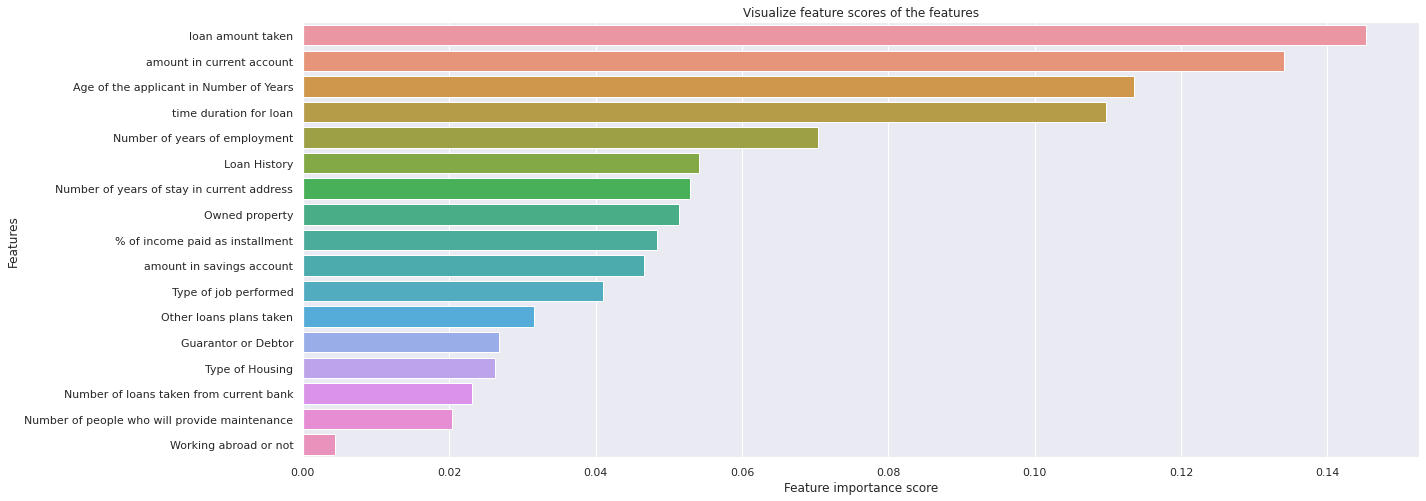

In [174]:
feature_scores = pd.Series(clf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
data = pd.DataFrame(feature_scores)
data['index'] = data.index
data.rename(columns = {0:'value'}, inplace = True)
data.reset_index(drop=True, inplace=True)
top = data['index'].head(25).values.tolist()

f, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x='value', y='index', data=data)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")

plt.show()

In [175]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '1': 303
Before OverSampling, counts of label '2': 117 

After OverSampling, the shape of train_X: (606, 17)
After OverSampling, the shape of train_y: (606,) 

After OverSampling, counts of label '1': 303
After OverSampling, counts of label '2': 303


In [176]:
X_train.shape

(420, 17)

# Model Testing

In [177]:
# Creating empty dictionary to store the scores for the evaluation of models

model_scores = {}

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_res,y_train_res)
model_scores["KNN"] = model_KNN.score(X_test,y_test)

svmreg = svm.LinearSVC()
svmreg.fit(X_train_res,y_train_res)
model_scores["SVM"] = svmreg.score(X_test, y_test)

import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
model_scores["XGB"] = xgb_model.score(X_test,y_test)

Rforrest = RandomForestClassifier(n_estimators = 100)
Rforrest.fit(X_train_res,y_train_res)
model_scores["RFC"] = Rforrest.score(X_test, y_test)

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_res, y_train_res)
model_scores["LGBM"] = Rforrest.score(X_test, y_test)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6,random_state=1)
dt.fit(X_train_res, y_train_res)
model_scores["DT"] =dt.score(X_test, y_test)

lr = LogisticRegression()
lr.fit(X_train_res,y_train_res)
model_scores["LR"] = lr.score(X_test,y_test)

model = ExtraTreesClassifier(random_state=123)
model.fit(X_train, y_train)
model_scores["ETrees"] = lr.score(X_test,y_test)

model = MLPClassifier()
model.fit(X_train, y_train)
model_scores["MLP"] = lr.score(X_test,y_test)

In [178]:
model_scores

{'KNN': 0.6888888888888889,
 'SVM': 0.7,
 'XGB': 0.7611111111111111,
 'RFC': 0.7611111111111111,
 'LGBM': 0.7611111111111111,
 'DT': 0.7388888888888889,
 'LR': 0.7,
 'ETrees': 0.7,
 'MLP': 0.7}

In [179]:
import joblib
joblib.dump(xgb_model,"model.joblib")

['model.joblib']

Text(0.5, 1.0, 'Accuracy of Algorithms')

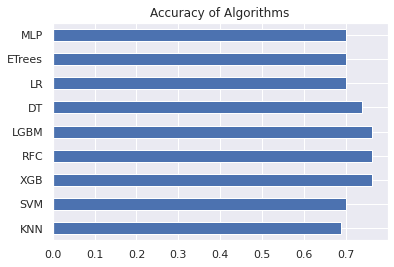

In [180]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

model_compare.T.plot.barh(legend=None);
plt.title("Accuracy of Algorithms")

There is a tie between Random Forest & LightGBM, hence we perform HyperTuning to obtain the best features

# Final Model

# Optimization
As our dataset is not too big, we will use GridSearchCV for parameter tuning, in case of large datasets RandomizedSearchCV could be better. 

In [181]:

params = {
    'n_estimators': [100, 500],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.7491364444922316
Best score: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}


XGBoost hyperparamter tuning

In [182]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='accuracy')
gs2.fit(X_train_res, y_train_res)

print('Best score:', gs2.best_score_)
print('Best paramters:',gs2.best_params_)

Best score: 0.735973597359736
Best paramters: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [183]:
gs2.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.1,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [184]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier


votes = [
    ('rf', gs1.best_estimator_),
    ('xgb', gs2.best_estimator_)
]

# soft voting based on weights
votesClass = VotingClassifier(estimators=votes, voting='soft', n_jobs=-1)
votesClass_cv = cross_validate(votesClass, X_train_res, y_train_res, cv=KFold(3,shuffle=True, random_state=123))
votesClass.fit(X_train_res, y_train_res)

votesClass_cv

{'fit_time': array([0.22266078, 0.21474886, 0.20715165]),
 'score_time': array([0.02269125, 0.02157259, 0.02759862]),
 'test_score': array([0.81683168, 0.82673267, 0.80693069])}

In [185]:
from sklearn.ensemble import ExtraTreesClassifier

model = votesClass
#model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print(model)
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_features='log2',
                                                     n_jobs=-1)),
                             ('xgb',
                              XGBClassifier(base_score=0.2, n_estimators=500,
                                            n_jobs=-1, reg_lambda=0.5))],
                 n_jobs=-1, voting='soft')
-------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       303
         2.0       1.00      0.98      0.99       117

    accuracy                           1.00       420
   macro avg       1.00      0.99      0.99       420
weighted avg       1.00      1.00      1.00       420

VotingClassifier(estimators=[('rf',
                              Ran

In [186]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']

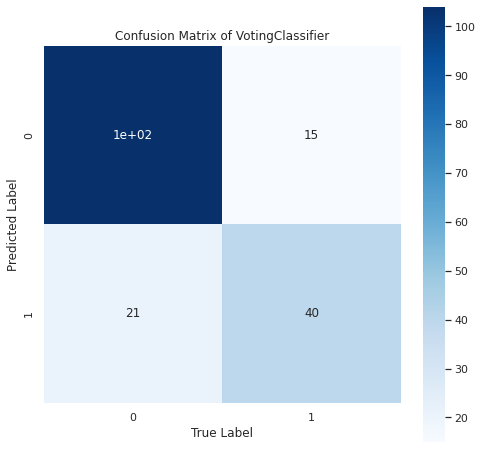

In [187]:
# Plotting Confusion Matrix
sns.set(font_scale=1.0)
def plot_conf_mat(y_test, model,name = "null"):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    y_preds = model.predict(X_test)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=True,

                    square = True,
                    cmap = 'Blues',
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title(f"Confusion Matrix of {name}")
    

plot_conf_mat(y_test, model, "VotingClassifier")

# Explainable AI using SHAP

RandomForestClassifier is a blackbox model i.e. difficult to interpret. So now I will be using SHAP(SHapley Additive exPlanations), to understand on what basis is model making prediction. Explainable AI is like performing EDA on model. Using this we try to understand how the model landed on particular predictions.

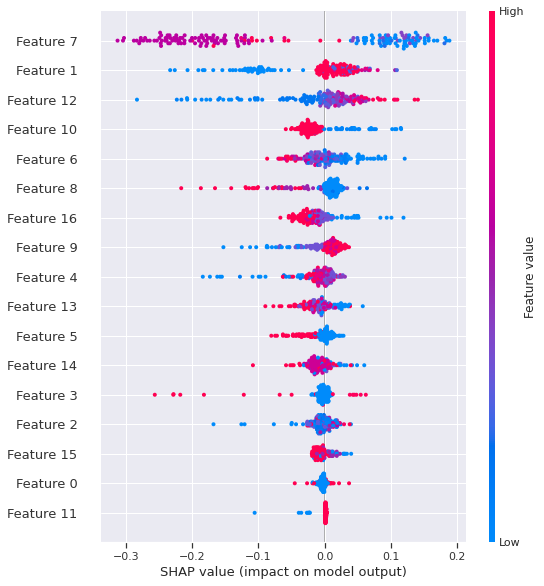

In [188]:
import shap

explainer = shap.TreeExplainer(Rforrest)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

Conclusions

- amount in current account is the most important feature according to the model
- When CryoSleep is True model is more inclined towards predicting True class
- The case Guarantor  or Debtor is exactly opposite, model is more inclined towards predicting True class if there is a guarantor
- The feature Working abroad or not has the least impact on the bank deciding to give a loan or not

In [189]:
"""my_scaler = joblib.load('minmaxscaler.pkl')
rfc = joblib.load('model.pkl')"""

"my_scaler = joblib.load('minmaxscaler.pkl')\nrfc = joblib.load('model.pkl')"

In [190]:
my_scaler = joblib.load('minmaxscaler.joblib')
model = joblib.load('model.joblib')

In [191]:
df.head(2)

,Number of people who will provide maintenance,Loan History,loan amount taken,Guarantor or Debtor,Number of years of employment,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,amount in savings account,% of income paid as installment,Other loans plans taken,Working abroad or not,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not
0,1.0,0.0,1028.0,0.0,2.333333,2.0,36.0,1.0,1.0,4.0,2.0,1.0,18.0,3.0,2.0,2.0,3.0,1.0
1,1.0,4.0,10222.0,0.0,3.000000,1.0,37.0,1.0,2.0,4.0,0.0,1.0,48.0,1.0,2.0,2.0,3.0,1.0


In [192]:
x = my_scaler.transform([df.iloc[3].values[:-1]])
x

array([[0.        , 1.        , 0.09221822, 0.        , 0.33333333,
        0.        , 0.05357143, 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.07352941, 0.33333333, 0.66666667,
        1.        , 0.33333333]])

In [193]:
model.predict(x)

array([2.])

In [194]:
!python --version

Python 3.8.10


In [195]:
df.iloc[9].values[:-1]

array([1.00000000e+00, 4.00000000e+00, 2.65900000e+03, 0.00000000e+00,
       1.66666667e+00, 1.00000000e+00, 2.80000000e+01, 0.00000000e+00,
       4.00000000e+00, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.80000000e+01, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       2.00000000e+00])

In [196]:
df.head(3)

,Number of people who will provide maintenance,Loan History,loan amount taken,Guarantor or Debtor,Number of years of employment,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,amount in savings account,% of income paid as installment,Other loans plans taken,Working abroad or not,time duration for loan,Owned property,Type of job performed,Type of Housing,Number of years of stay in current address,Loan Defaulted or not
0,1.0,0.0,1028.0,0.0,2.333333,2.0,36.0,1.0,1.0,4.0,2.0,1.0,18.0,3.0,2.0,2.0,3.0,1.0
1,1.0,4.0,10222.0,0.0,3.000000,1.0,37.0,1.0,2.0,4.0,0.0,1.0,48.0,1.0,2.0,2.0,3.0,1.0
2,1.0,4.0,701.0,0.0,1.333333,1.0,40.0,0.0,1.0,4.0,2.0,1.0,12.0,3.0,0.0,2.0,2.0,1.0


In [197]:
y =  my_scaler.transform([df.iloc[6].values[:-1]])
y

array([[0.        , 0.        , 0.70195237, 0.        , 1.        ,
        0.33333333, 0.41071429, 0.33333333, 0.33333333, 0.33333333,
        1.        , 1.        , 0.47058824, 0.        , 0.66666667,
        0.        , 1.        ]])

In [198]:
model.predict(y)

array([1.])

In [199]:
df.iloc[6].values[:-1].dtype

dtype('float64')

In [200]:
joblib.__version__

'1.2.0'